In [11]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
#Load the dataset
df = pd.read_csv('/content/sample_data/creditcard.csv')

In [24]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount_Scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [13]:
#drop null values
df.dropna(inplace = True)

In [16]:
#Basic Data Info
print("Dataset Shape:", df.shape)
print(df['Class'].value_counts()) #Fraud cases are labeled as 1

Dataset Shape: (284807, 30)
Class
0    284315
1       492
Name: count, dtype: int64


In [15]:
# Feature engineering : Scale 'Amount' column (others are already scaled)
scaler  = StandardScaler()
df['Amount_Scaled'] = scaler.fit_transform(df[['Amount']])
df = df.drop(['Time', 'Amount'], axis = 1)

In [17]:
# Train-Test split
# Drop rows with NaN values before splitting the data
df_cleaned = df.dropna()
X = df_cleaned.drop('Class', axis = 1)
Y = df_cleaned['Class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [18]:
#Model training (Logistic Regression)
lr_model = LogisticRegression(max_iter= 1000)
lr_model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [19]:
#Prediction and Evaluation
y_pred = lr_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("\nClassification Report:\n", classification_report(Y_test, y_pred, digits = 4))

Confusion Matrix:
 [[56854    10]
 [   42    56]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9993    0.9998    0.9995     56864
           1     0.8485    0.5714    0.6829        98

    accuracy                         0.9991     56962
   macro avg     0.9239    0.7856    0.8412     56962
weighted avg     0.9990    0.9991    0.9990     56962



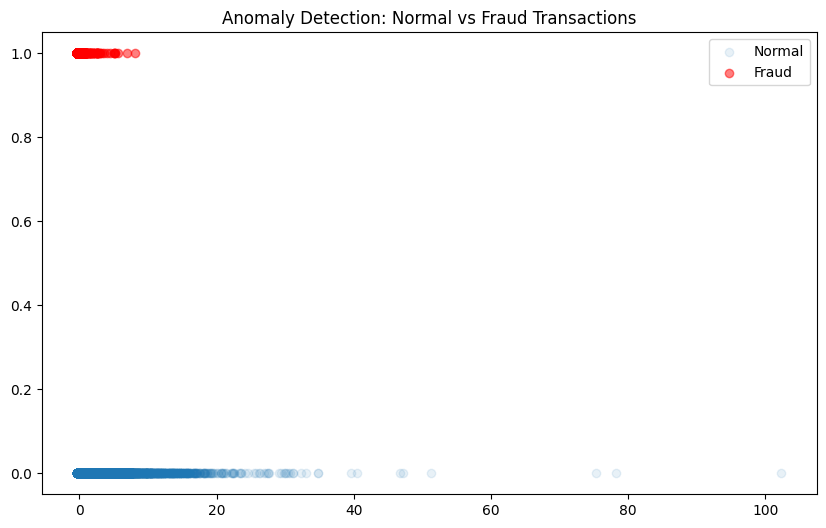

In [20]:
#   Visualizing Anomaly Detection
fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0]



plt.figure(figsize = (10,6))
plt.scatter(normal['Amount_Scaled'], np.zeros_like(normal['Amount_Scaled']), alpha = 0.1, label = "Normal")
plt.scatter(fraud['Amount_Scaled'], np.ones_like(fraud['Amount_Scaled']), color = 'red', alpha = 0.5, label = "Fraud")
plt.legend()
plt.title("Anomaly Detection: Normal vs Fraud Transactions")
plt.show()


**Insights**

1. Clear separation between fraud and normal.

2. Fraud occurs mostly in transactions with low feature values.
- Fraud is happening in low-value transactions
- Fraud may correlate strongly with low feature scores.

3. No overlap between classes.

In [22]:
import seaborn as sns

Text(0.5, 1.0, 'Fraud vs Normal: V14 vs Scaled Amount')

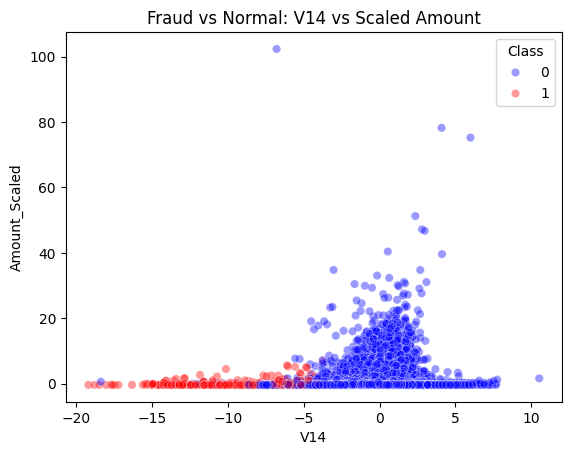

In [23]:
sns.scatterplot(data = df, x='V14', y='Amount_Scaled', hue='Class', alpha=0.4, palette={0: 'blue', 1: 'red'})
plt.title("Fraud vs Normal: V14 vs Scaled Amount")

 Key Observations:

**Fraudulent Transactions (Red, Class 1):**

Clustered mostly on the left side of the V14 axis (between -20 and -5)
These points mostly have low Amount_Scaled values (close to 0).
Suggests that negative V14 values are strong indicators of fraud, especially with small amounts.


**Normal Transactions (Blue, Class 0):**
Spread across a wide range of V14 values, mostly between -5 and +10.
These also cover a broad spectrum of scaled amounts, including some high-value transactions.
Indicates greater variance and volume in normal transactions.

**Separation Possibility:**

There is a clear separation between fraud and normal in certain V14 regions (especially < -5).
This suggests that V14 is a strong feature for detecting fraud when combined with Amount.

